In [1]:
import pickle
with open ('/kaggle/input/processed-uci/processed.pkl', 'rb') as f:
    df=pickle.load(f)
    

In [2]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.272059,0.0,0.468418,-0.122330,0.0,-1.161395,1.0,-0.734914,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
298,-1.056185,1.0,-1.223355,0.320744,0.0,-0.768432,0.0,0.124076,1,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
299,1.489615,1.0,0.693988,-1.047008,1.0,-0.375469,0.0,2.013854,2,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,0.272059,1.0,-0.095506,-2.241384,0.0,-1.510696,1.0,0.124076,3,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [3]:
from sklearn.decomposition import PCA
import numpy as np

cov_matrix=np.cov(df.drop('target', axis=1))
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print('eigen values: ',np.real(eigenvalues))
print("\neigen vectors: ", np.real(eigenvectors))

eigenvalues=np.real(eigenvalues)
eigenvectors=np.real(eigenvectors)

eigen values:  [ 2.78463329e+01  1.97768195e+01  1.18977569e+01  1.03978946e+01
  8.71026988e+00  5.79280932e+00  5.66428900e+00  4.28914169e+00
  3.84862196e+00  3.49170028e+00  2.83658135e+00  2.31878997e+00
  1.84665980e+00  1.59178898e+00  1.48465423e+00  1.17583435e+00
  1.09481430e+00  9.04454592e-01  7.96193637e-01  3.80269660e-01
  2.44738167e-02  2.96538616e-15 -2.55709131e-15 -2.41138343e-15
 -2.41138343e-15  2.49225839e-15 -2.31231954e-15  2.15742238e-15
  2.15742238e-15  2.13640972e-15  2.13640972e-15 -2.14307292e-15
  1.59380685e-15  1.59380685e-15  2.06460988e-15 -1.98526527e-15
 -1.98526527e-15  1.87413431e-15  1.87413431e-15 -1.89061237e-15
 -1.89061237e-15 -1.75133432e-15 -1.75133432e-15 -1.81562033e-15
 -1.81562033e-15 -1.03138398e-15 -1.03138398e-15 -1.66700436e-15
 -1.66700436e-15 -1.62827842e-15 -1.59021778e-15  1.80348705e-15
  1.63289700e-15  1.63289700e-15  1.63130310e-15  1.53177955e-15
  1.53177955e-15  1.51154576e-15  1.51154576e-15  1.45271253e-15
  1.452712

In [4]:
varianceRatio=eigenvalues/eigenvalues.sum()
cumulativeVariance=np.cumsum(varianceRatio)
print("variance ratio : ", varianceRatio[:10])
print("\nCumulative variance : ", cumulativeVariance)

#according to elbow method, 0.9 or 0.91 is okay for both reducing dim, and retaining info.

variance ratio :  [0.23970299 0.17024011 0.10241664 0.08950573 0.07497855 0.04986487
 0.04875856 0.0369212  0.03312918 0.03005678]

Cumulative variance :  [0.23970299 0.40994311 0.51235975 0.60186548 0.67684404 0.72670891
 0.77546746 0.81238867 0.84551785 0.87557462 0.8999921  0.91995239
 0.93584855 0.94955077 0.96233077 0.97245242 0.98187666 0.98966226
 0.99651594 0.99978933 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.       

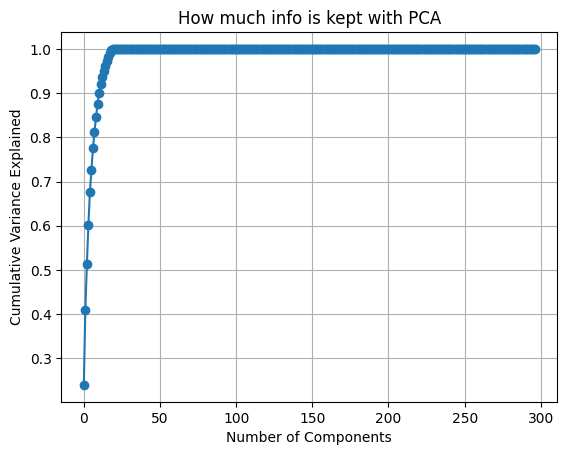

In [5]:
import matplotlib.pyplot as plt

plt.plot(cumulativeVariance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("How much info is kept with PCA")
plt.grid()
plt.show()

#this graph explains how many components i can take earlier to keep enough datavariance or dataknowledge.

In [6]:
import pandas as pd
x = df.drop("target", axis=1)
y = df["target"]                

pca=PCA(n_components=0.90)
x_pca=pca.fit_transform(x)

x_pca_df=pd.DataFrame(x_pca, columns = [f"PCA{i+1}" for i in range(0,x_pca.shape[1])])

x_pca_df['target']=y.values

In [7]:
x_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,target
0,-1.142929,0.304724,-1.149042,-0.158837,0.876139,0.595961,0.176824,-0.009395,0.174649,-0.912271,0.564693,-0.136827,0
1,-2.754957,0.839171,0.146543,-0.662535,-0.784552,0.343510,0.803580,-0.391040,-0.013703,0.236447,0.145463,-0.366100,2
2,-2.227239,-1.063098,0.476438,0.004591,0.701716,0.722079,-0.727509,-0.075420,-0.514487,-0.172939,-0.095164,0.162051,1
3,1.140714,-0.565884,-1.654154,2.411838,1.395045,-0.672393,0.620638,-0.000940,0.593531,0.182818,-0.108343,-0.372634,0
4,1.701610,-0.278171,-1.043368,0.592310,0.262726,0.785178,0.685079,-0.625560,0.110237,0.073178,0.459393,0.353327,0


In [9]:
import pickle
with open ('/kaggle/working/pca-processed-uci.pkl','wb') as f:
    pickle.dump(x_pca_df,f)
    